# Example 3.4

A modified Proctor test is performed on a soil sample, resulting in the data presented in the table below. Determine: (i) the maximum dry density, (ii) the optimum water content, (iii) the void ratio and saturation at the maximum dry density, and (iv) plot the data with the ZAV and a line passing through the saturation at the optimum water content. Assume $G_s=2.67$

## Data:

$G_s=2.67$

Table

## Principles part (i) and (ii)

We need to plot $\gamma_d$ Vs $w$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Soilved as slv

In [2]:
# load the data from csv format

Proctor_data=pd.read_csv('./data/mod3example4.csv') # reads data

Proctor_data #shows table

,gamma pcf,w
0,104.0,14
1,105.5,16
2,106.0,18
3,105.0,20
4,103.5,22
5,101.0,24


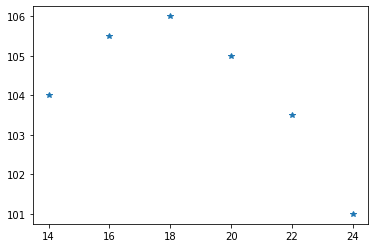

In [3]:
# now we can plot the data to visualize it
plt.plot(Proctor_data['w'], Proctor_data['gamma pcf'], '*')

gamma_dmax= 106.03 pcf
w_opt= 17.62 percent


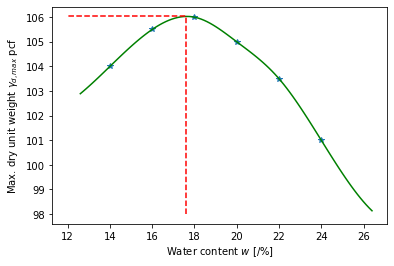

In [6]:
# now I'm going to use my function

gamma_max, w_opt=slv.ProcessProctor(Proctor_data['w'], Proctor_data['gamma pcf'], units='pcf') #creates a cubic spline

print('gamma_dmax= %1.2f pcf' %gamma_max)
print('w_opt= %1.2f percent' %w_opt)

#Add details to plot
plt.plot([w_opt, w_opt, 12], [98, gamma_max, gamma_max], '--', color='r') # interpolation line

## Principles part (iii)

$\gamma_{d}=\gamma_w \cfrac{G_s}{1+e}$

$Se=w G_s$





In [7]:
# lets solve e from the first equation

Gs=2.67 # specific gravity

e=(62.4*Gs/gamma_max)-1 # void ratio
print('e= %1.2f' %e)

S=w_opt*Gs/e # saturation in percent
print('S= %1.2f percent' %S)

e= 0.57
S= 82.33 percent


## Principles part (iv)

$\gamma_d=\cfrac{\gamma_w G_s}{1+w G_s/S}$

(98.0, 120.0)

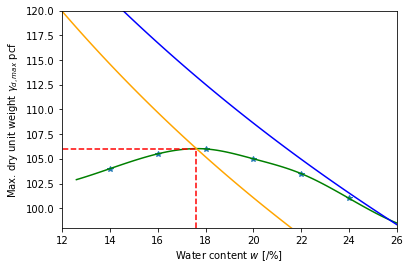

In [14]:
# I'm first defining values of w

w=np.linspace(12, 26, 100) # 100 values from 12 to 26 percent

#Now I can generate the line using my function

ZAV=slv.GetCompactionLines(w,S=100, gamma_w=62.4, Gs=Gs) # ZAV line

l_satmax=slv.GetCompactionLines(w, S=S, gamma_w=62.4, Gs=Gs) # line of equal saturation passing at max density

#run process proctor to recreate the plot

gamma_max, w_opt=slv.ProcessProctor(Proctor_data['w'], Proctor_data['gamma pcf'], units='pcf') #creates a cubic spline

#Add details to plot
plt.plot([w_opt, w_opt, 12], [98, gamma_max, gamma_max], '--', color='r') # interpolation line
plt.plot(w, ZAV, 'b') #ZAV line
plt.plot(w, l_satmax, 'orange') #line of equal saturation
plt.xlim([12, 26])
plt.ylim([98,120])